# HSV Thresholding With Sliders
It's slow
Very slow

C:\Users\Bob\Documents\GitHub\limelight-tools
C:\Users\Bob\Documents\GitHub\limelight-tools\.git
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\hooks
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\info
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\logs
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\logs\refs
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\logs\refs\heads
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\logs\refs\remotes
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\logs\refs\remotes\origin
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\objects
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\objects\07
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\objects\17
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\objects\1a
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\objects\2a
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\objects\37
C:\Users\Bob\Documents\GitHub\limelight-tools\.git\objects\3c
C:\Users\Bob\Documents\GitHub\

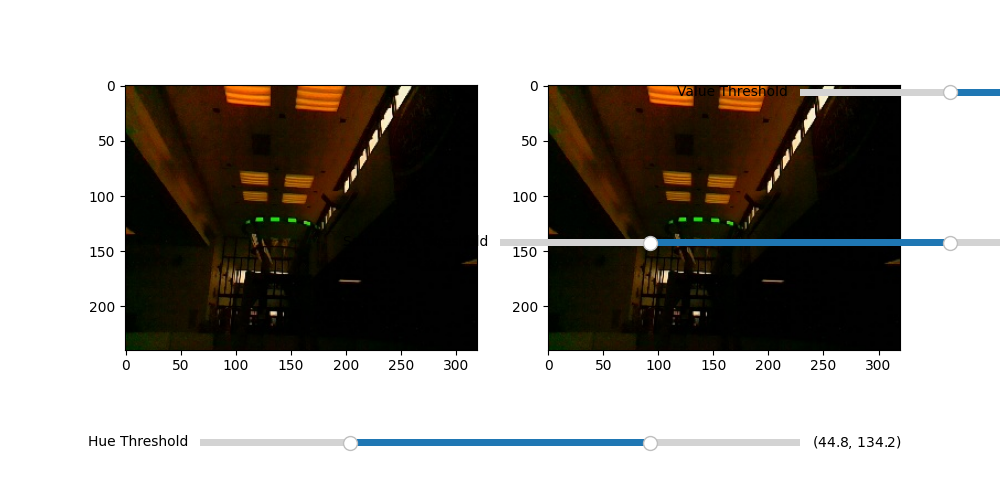

In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import RangeSlider
import cv2
import os
plt.ion()

base_path = os.getcwd()

for my_path, my_subdirs, my_files in os.walk(base_path):
    print(my_path)
    for my_file in my_files:
        if(my_file.endswith(".jpg")):
            
            # Concatenate strings so we can access images in subdirs
            image = cv2.imread(my_path + "/" + my_file)

hue_min = saturation_min = value_min = 0
hue_max = 179
saturation_max = value_max = 0

# generate a fake image
lower = np.array([hue_min, saturation_min, value_min])
upper = np.array([hue_max, saturation_max, value_max])

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(image, image, mask=mask)
img = result

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(bottom=0.25)

axs[1].imshow(rgb_image)
axs[0].imshow(rgb_image)

# Create the RangeSlider
hue_slider_ax = plt.axes([0.20, 0.1, 0.60, 0.03])
hue_slider = RangeSlider(hue_slider_ax, "Hue Threshold", hue_min, hue_max)

saturation_slider_ax = plt.axes([0.50, 0.5, 0.60, 0.03])
saturation_slider = RangeSlider(saturation_slider_ax, "Saturation Threshold", hue_min, hue_max)

value_slider_ax = plt.axes([0.80, 0.8, 0.60, 0.03])
value_slider = RangeSlider(value_slider_ax, "Value Threshold", hue_min, hue_max)

# WARNING: Messy copy and paste code below, you have been warned.

def hue_update(val):
    # The val passed to a callback by the RangeSlider will
    # be a tuple of (min, max)

    lower[0] = val[0]
    upper[0] = val[1]

    image_update() 

def saturation_update(val):
    lower[1] = val[0]
    upper[1] = val[1]

    image_update() 

def value_update(val):
    lower[2] = val[0]
    upper[2] = val[1]

    image_update() 

def image_update():
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(rgb_image, rgb_image, mask=mask)
    updated_img = result
    axs[1].imshow(updated_img)

    fig.canvas.draw_idle() 

hue_slider.on_changed(hue_update)
saturation_slider.on_changed(saturation_update)
value_slider.on_changed(value_update)

plt.show()